<a href="https://colab.research.google.com/github/jaicdev/Notebooks/blob/main/Nueral_Network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Jupyter notebook draws inspiration from a tutorial by Samson Zhang on YouTube. You can access the tutorial at the following link: [Samson Zhang's YouTube Tutorial](https://www.youtube.com/watch?v=w8yWXqWQYmU). The dataset MNIST used can be downloaded from [MNIST Dataset](https://www.kaggle.com/competitions/digit-recognizer/data)

Import the required libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

This section loads the training and test datasets from CSV files into NumPy arrays.



In [2]:
data_train = pd.read_csv('/content/train.csv')
data_train = np.array(data_train)

In [3]:
data_test = pd.read_csv('/content/test.csv')
data_test = np.array(data_test)

Transpose the datasets to have examples as columns and features as rows. Also, normalize the pixel values of the images to be between 0 and 1.



In [4]:
data_train = data_train.T
Y_train, X_train = data_train[0], data_train[1:] / 255.
_, m_train = X_train.shape

In [5]:
data_test = data_test.T
Y_test, X_test = data_test[0], data_test[1:] / 255.
_, m_test = X_test.shape

This function initializes the parameters (weights and biases) for the neural network.

In [6]:
# Initialize parameters for the neural network
def init_params():
    W1 = np.random.randn(10, 784) * 0.01
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

These functions define the ReLU activation function and the softmax activation function used in the neural network.

In [7]:
# ReLU activation function
def ReLU(Z):
    return np.maximum(Z, 0)

# Softmax activation function
def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

This function performs forward propagation through the neural network, calculating the activations at each layer.

In [8]:
# Forward propagation through the neural network
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [9]:
# Derivative of ReLU activation function
def ReLU_deriv(Z):
    return Z > 0

In [10]:
# One-hot encoding of labels
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

This function performs backward propagation to calculate the gradients of the parameters with respect to the loss.This function updates the parameters using gradient descent.

In [11]:
# Backward propagation to update parameters
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [12]:
# Update parameters using gradient descent
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [13]:
# Get predictions from the output layer
def get_predictions(A2):
    return np.argmax(A2, axis=0)

# Calculate accuracy of predictions
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

# Gradient descent optimization algorithm
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Accuracy: {accuracy:.4f}")
    return W1, b1, W2, b2

In [14]:
# Train the neural network
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.10, iterations=500)

Iteration: 0, Accuracy: 0.1250
Iteration: 10, Accuracy: 0.2132
Iteration: 20, Accuracy: 0.2638
Iteration: 30, Accuracy: 0.2648
Iteration: 40, Accuracy: 0.2677
Iteration: 50, Accuracy: 0.3109
Iteration: 60, Accuracy: 0.3375
Iteration: 70, Accuracy: 0.3559
Iteration: 80, Accuracy: 0.3813
Iteration: 90, Accuracy: 0.4382
Iteration: 100, Accuracy: 0.5075
Iteration: 110, Accuracy: 0.5724
Iteration: 120, Accuracy: 0.6360
Iteration: 130, Accuracy: 0.6825
Iteration: 140, Accuracy: 0.7130
Iteration: 150, Accuracy: 0.7344
Iteration: 160, Accuracy: 0.7516
Iteration: 170, Accuracy: 0.7672
Iteration: 180, Accuracy: 0.7796
Iteration: 190, Accuracy: 0.7910
Iteration: 200, Accuracy: 0.8021
Iteration: 210, Accuracy: 0.8113
Iteration: 220, Accuracy: 0.8199
Iteration: 230, Accuracy: 0.8274
Iteration: 240, Accuracy: 0.8344
Iteration: 250, Accuracy: 0.8403
Iteration: 260, Accuracy: 0.8462
Iteration: 270, Accuracy: 0.8510
Iteration: 280, Accuracy: 0.8551
Iteration: 290, Accuracy: 0.8590
Iteration: 300, Accur

In [15]:
# Make predictions on a few training examples
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = get_predictions(forward_prop(W1, b1, W2, b2, current_image)[-1])
    label = Y_train[index]

    print("Prediction:", prediction)
    print("Label:", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction: [1]
Label: 1


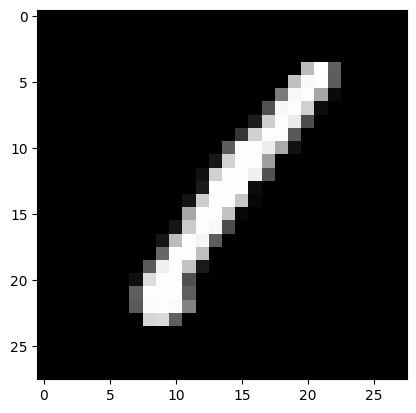

Prediction: [0]
Label: 0


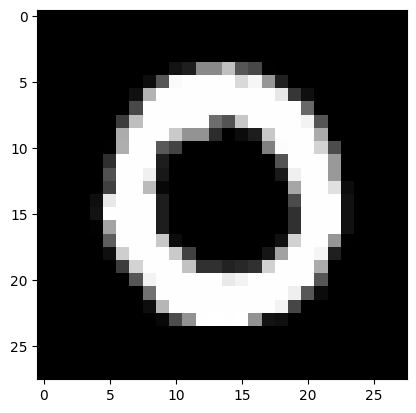

Prediction: [1]
Label: 1


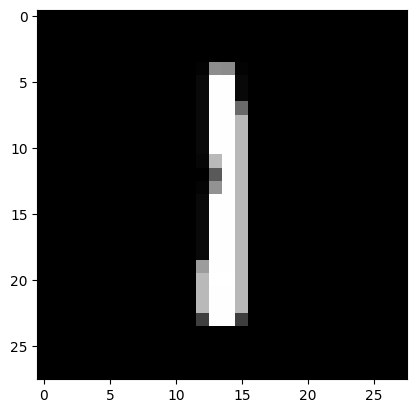

Prediction: [2]
Label: 4


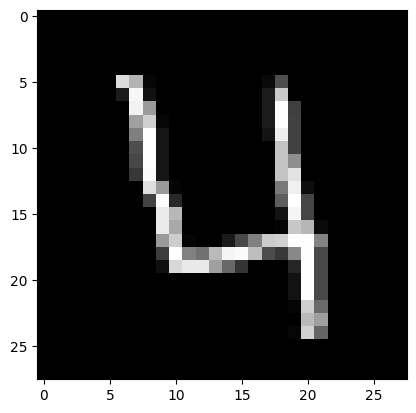

In [16]:
# Test predictions on a few training examples
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)